# Let's Grow More Data Science Virtual Internship Program june 2023

# LGMVIP june 2023

## BY: Syed Ameen Ikhlaas H 

### BEGINNER LEVEL TASK

## TASK 1: Iris Flowers Classification ML Project

This particular ML project is usually referred to as the “Hello World” of Machine Learning. The iris flowers dataset contains numeric attributes, and it is perfect for beginners to learn about supervised ML algorithms, mainly how to load and handle data. Also, since this is a small dataset, it can easily fit in memory without requiring special transformations or scaling capabilities.

### Dataset Link: http://archive.ics.uci.edu/ml/machine-learning-databases/iris

### Importing the Required Library

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

### Loading the Dataset

In [11]:
iris = pd.read_csv('C:\\Users\\user\\Downloads\\iris\\iris.data',
                  names = ['sepal length','sepal width','petal length',
                                   'petal width','class'])

In [12]:
iris

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Exploratory Data Analysis

In [14]:
iris.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
iris.shape

(150, 5)

In [16]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [17]:
iris.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [18]:
iris.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

In [20]:
iris['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

#### Data Visualisation

<AxesSubplot:xlabel='sepal width', ylabel='petal width'>

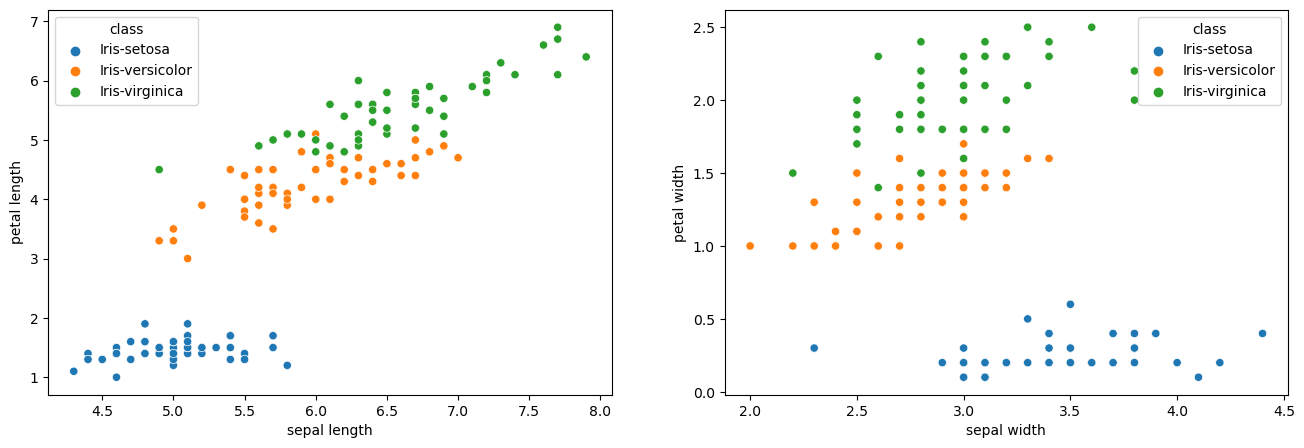

In [36]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(16,5))
sns.scatterplot(x = 'sepal length', y= 'petal length', data = iris, hue = 'class',ax = ax1)
sns.scatterplot(x = 'sepal width', y = 'petal width', data = iris, hue = 'class', ax = ax2)

<AxesSubplot:xlabel='petal width', ylabel='Count'>

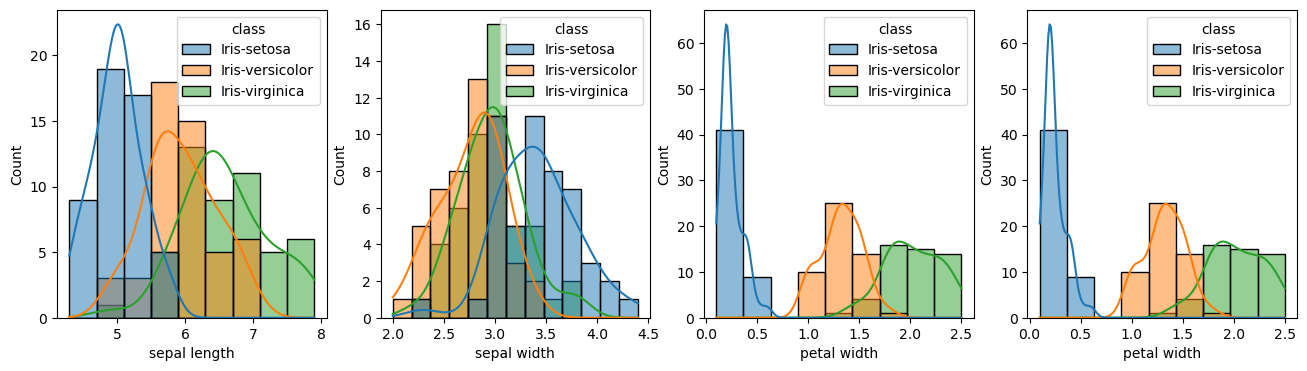

In [37]:
plt.figure(figsize=(16,4))
plt.subplot(1,4,1)
sns.histplot(data=iris,x='sepal length',hue= 'class',kde=True)
plt.subplot(1,4,2)
sns.histplot(data=iris,x='sepal width',hue= 'class',kde=True)
plt.subplot(1,4,3)
sns.histplot(data=iris,x='petal width',hue= 'class',kde=True)
plt.subplot(1,4,4)
sns.histplot(data=iris,x='petal width',hue= 'class',kde=True)

<AxesSubplot:ylabel='petal width'>

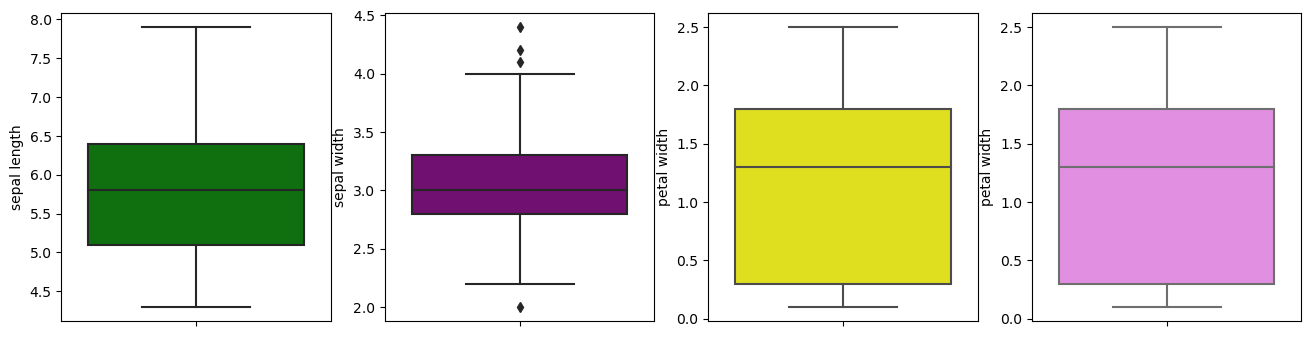

In [38]:
plt.figure(figsize=(16,4))
plt.subplot(1,4,1)
sns.boxplot(data=iris,y='sepal length', color = 'green')
plt.subplot(1,4,2)
sns.boxplot(data=iris,y='sepal width',color='purple')
plt.subplot(1,4,3)
sns.boxplot(data=iris,y='petal width',color='yellow')
plt.subplot(1,4,4)
sns.boxplot(data=iris,y='petal width',color= 'violet')

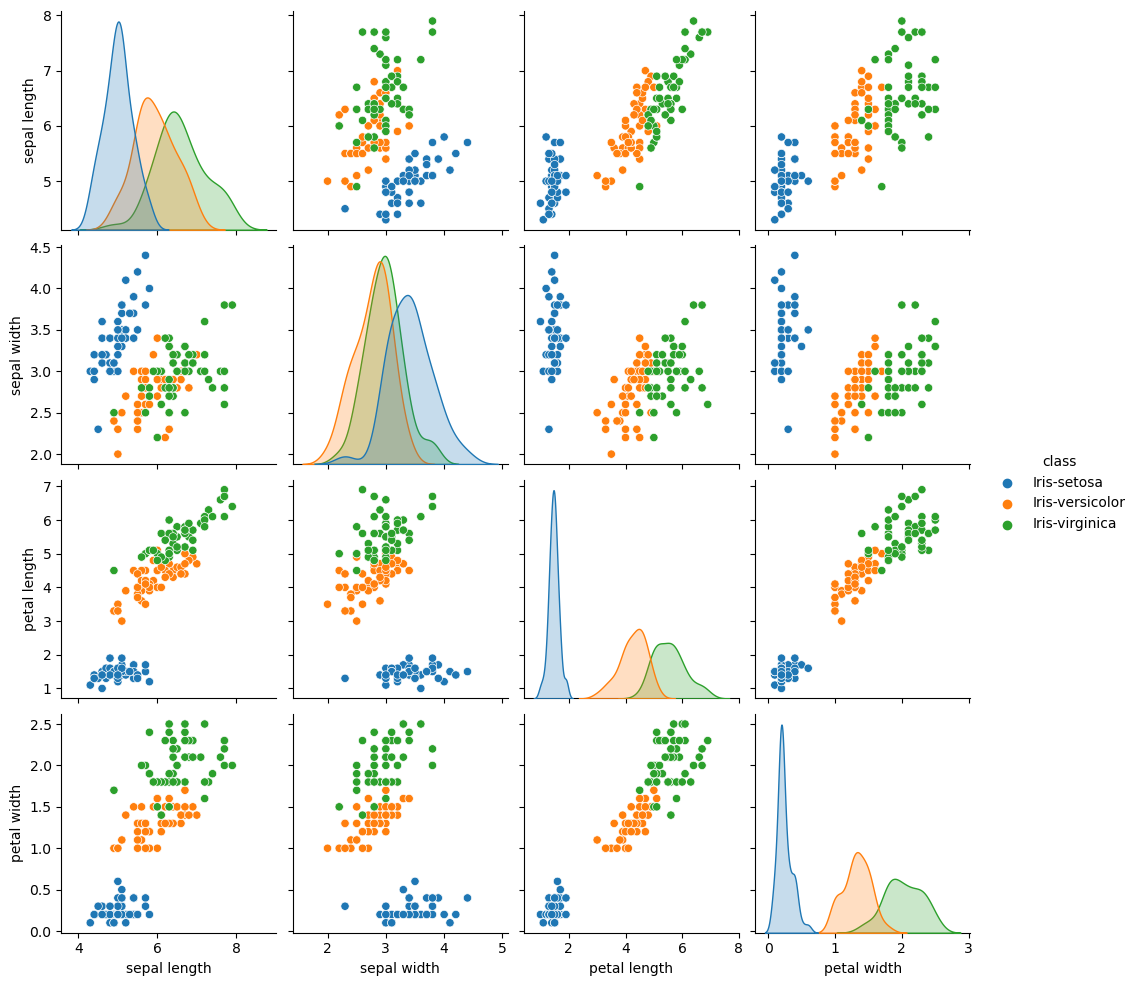

In [39]:
sns.pairplot(iris, hue= 'class',)

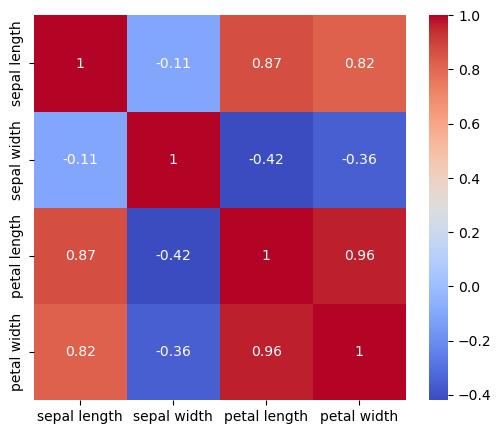

In [54]:
plt.figure(figsize=(6,5))
sns.heatmap(iris.corr(), annot=True,cmap='coolwarm')
plt.show()

### Preprocessing the dataset

In [55]:
#preprocessing the dataset before training the data
le = LabelEncoder()
iris['class']=le.fit_transform(iris['class'])

In [56]:
iris.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [58]:
X = iris.drop(columns=['class'])
Y = iris['class']
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size = 0.3, stratify= Y)

## Training the Dataset

## Model 1: Logistic Regression

In [65]:
lr = LogisticRegression(max_iter = 100)
lr.fit(x_train,y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [67]:
y_pred=lr.predict(x_test)
score=accuracy_score(y_test,y_pred)

In [68]:
score

0.9777777777777777

In [72]:
def report(model):
    preds=model.predict(x_test)
    print(classification_report(preds,y_test))
    cm = confusion_matrix(y_test, preds, labels = model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
    disp.plot()
    plt.show()

#### Classification report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      1.00      0.97        14
           2       1.00      0.94      0.97        16

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



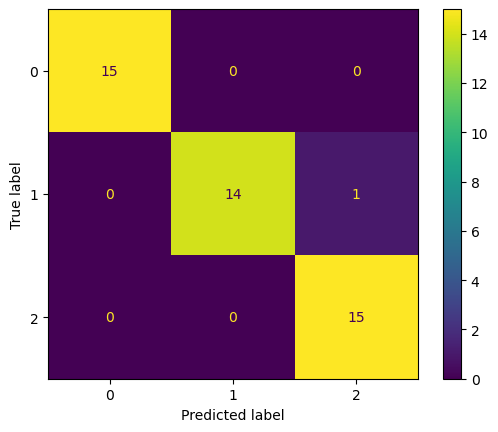

Accuracy: 97.78%


In [74]:
report(lr)
print(f'Accuracy: {round(score*100,2)}%')

## Model 2: Decision Tree Classifier

In [76]:
tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [77]:
y_pred = tree.predict(x_test)
tree_score = accuracy_score(y_test,y_pred)

In [78]:
tree_score

0.9555555555555556

#### Classification report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      0.93      0.93        15
           2       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



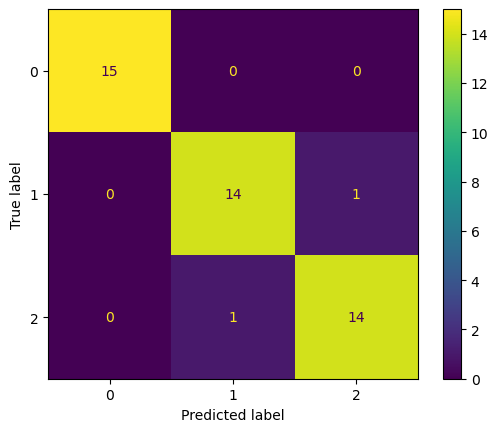

Accuracy: 95.56%


In [80]:
report(tree)
print(f'Accuracy: {round(tree_score*100,2)}%')

## Model 3: Linear SVC [ Support Vector Classifier ] 

In [81]:
l_svc = SVC()
l_svc.fit(x_train,y_train)

SVC()

In [82]:
y_pred = l_svc.predict(x_test)
svc_score = accuracy_score(y_test,y_pred)

In [83]:
svc_score

0.9777777777777777

#### Classification report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      1.00      0.97        14
           2       1.00      0.94      0.97        16

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



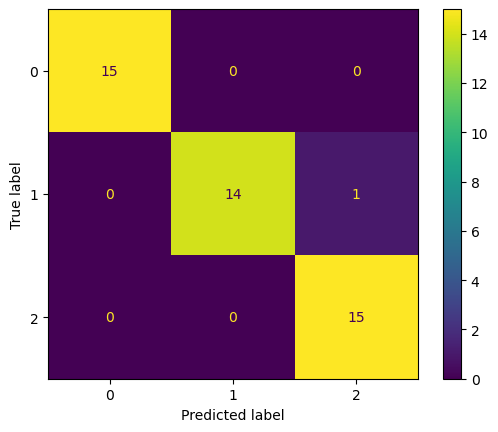

Accuracy: 97.78%


In [85]:
report(l_svc)
print(f'Accuracy: {round(svc_score*100,2)}%')

## Model 4: Navies Bayes

In [87]:
nb = MultinomialNB()
nb.fit(x_train,y_train)

MultinomialNB()

In [88]:
y_pred = nb.predict(x_test)
nb_score = accuracy_score(y_test,y_pred)

In [89]:
nb_score

0.9111111111111111

#### Classification report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.80      0.92      0.86        13
           2       0.93      0.82      0.87        17

    accuracy                           0.91        45
   macro avg       0.91      0.92      0.91        45
weighted avg       0.92      0.91      0.91        45



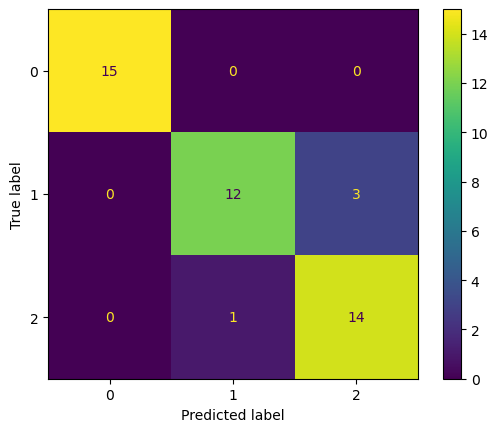

Accuracy: 91.11%


In [90]:
report(nb)
print(f'Accuracy: {round(nb_score*100,2)}%')

## Model 5: K-Nearest Neighbors [KNN]

In [99]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [100]:
y_pred = knn.predict(x_test)
knn_score = accuracy_score(y_test,y_pred)

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [101]:
knn_score

0.9555555555555556

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      0.93      0.93        15
           2       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



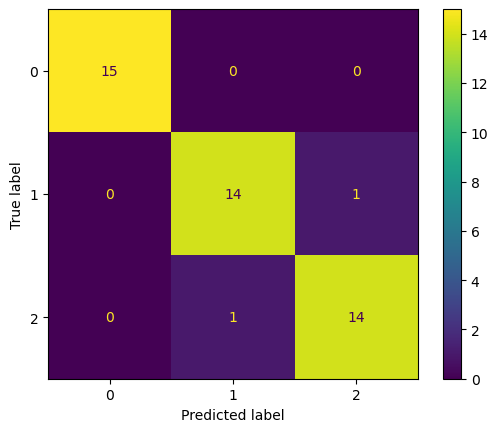

Accuracy: 95.56%


In [102]:
report(knn)
print(f'Accuracy: {round(knn_score*100,2)}%')

## All Algorithms Accuracy Chart

In [107]:
details = { 'Models':['Logistic Regression','Decision Tree','Linear SVC','Naive Bayes', 'KNN'],
    'Accuracy':[score,tree_score,svc_score,nb_score,knn_score]}

In [108]:
models = pd.DataFrame(data=details)

In [109]:
models

,Models,Accuracy
0,Logistic Regression,0.977778
1,Decision Tree,0.955556
2,Linear SVC,0.977778
3,Naive Bayes,0.911111
4,KNN,0.955556


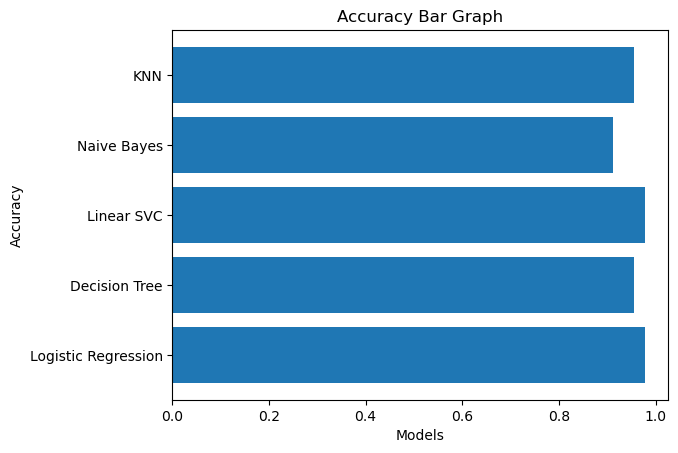

In [111]:
plt.barh(models['Models'],models['Accuracy'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Bar Graph')
plt.show()

## Prediction using new data point

In [115]:
models = [lr,tree,l_svc,nb,knn]

def prediction(array,model):
    preds = model.predict(array)
    if preds == 0:
        print('Iris setosa')
    if preds == 1:
        print('Iris versicolor')
    if preds == 2:
        print('Iris virginica')

In [128]:
X_new = np.array([[3,2,1,0.2],[4.9,2.2,3.8,1.1],[5.3,2.5,4.6,2.9]])

In [135]:
prediction(X_new[:1],lr)

Iris setosa


C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [138]:
X_new[1:2]

array([[4.9, 2.2, 3.8, 1.1]])

In [139]:
prediction(X_new[1:2],tree)

Iris versicolor


C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [140]:
prediction(X_new[2:],knn)

Iris virginica


C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [146]:
arr = np.array([[5.1,3.5,1.4,0.2]])

In [148]:
prediction(arr,nb)

Iris setosa


C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
